In [2]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [7]:
df.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

In [9]:
df['age'].fillna(method='ffill',inplace=True)
df.dropna(inplace=True)

C:\Users\Abid.MD\AppData\Local\Temp\ipykernel_13636\650607885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(method='ffill',inplace=True)
C:\Users\Abid.MD\AppData\Local\Temp\ipykernel_13636\650607885.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['age'].fillna(method='ffill',inplace=True)


In [10]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
1,3,male,38.0,0,0,8.6625,S,0
2,3,female,30.0,1,1,24.1500,S,0
3,2,female,54.0,1,3,23.0000,S,1
4,2,male,40.0,0,0,13.0000,S,0
5,3,male,28.0,0,0,22.5250,S,0


In [12]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       100
           1       0.69      0.50      0.58        70

    accuracy                           0.70       170
   macro avg       0.70      0.67      0.67       170
weighted avg       0.70      0.70      0.69       170

0.67


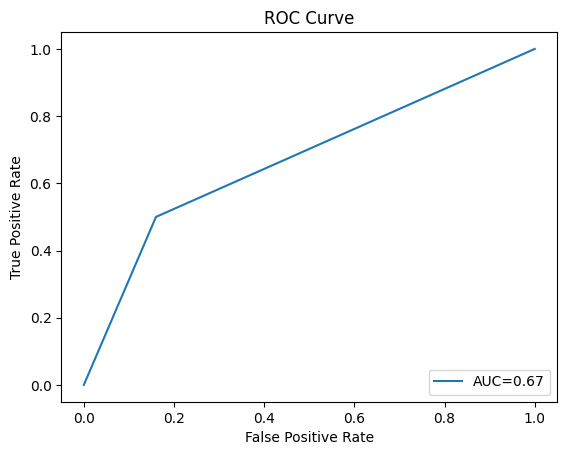

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X= df.drop('survived',axis=1)
y= df['survived']

X=pd.get_dummies(X)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=MultinomialNB()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report=classification_report(y_test,y_pred)
print(report)

from sklearn.metrics import auc,roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()


In [ ]:
def evalution_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    cm = confusion_matrix(actual, pred)
    report = classification_report(actual, pred)
    return accuracy, cm, report